ANÁLISIS DE LA CARTERA MOROSA EN SUCURSALES - BANCO NACION ARGENTINA -

Para arrancar voy a importar las librerias que voy a  utilizar.-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extraigo el archivo que contiene la base de datos a analizar y la almaceno en un df.-

In [2]:
df=pd.read_excel(r"C:\Users\Agustín\Desktop\Base para GitHub\Analisis Mora\Analisis Mora Bna1.xlsx")

In [3]:
df.head()

,Numero_Cliente,Codigo_Sucursal,Nombre_Sucursal,Nombre,VTO.,Atraso,Cartera,Sit.,Desc_Actividad,Grupo_Actividad,Sector_Actividad,Segmentacion,Deuda_Pesificada
0,10001,1046,ALTA CORDOBA,GABRIEL,2022-12-01,30,2,1,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA INACTIVA PREVISIO,316007.96
1,10002,1046,ALTA CORDOBA,MELISA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,287595.70
2,10003,1046,ALTA CORDOBA,PEDRO ANDRES,2022-12-01,30,2,1,PERSONAS FIS.QUE DESARROLLEN ALGUNA ACTIV.,FAMILIAS,NO CLASIFICADO,CARTERA INACTIVA HABERES,232587.05
3,10004,1046,ALTA CORDOBA,ELBA ROSA,2022-11-23,38,2,2,JUBILADOS Y PENSIONADOS,FAMILIAS,NO CLASIFICADO,CARTERA PREVISIONAL,174700.00
4,10005,1046,ALTA CORDOBA,MARIA FERNANDA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,159177.00


In [4]:
df.describe()

,Numero_Cliente,Codigo_Sucursal,Atraso,Cartera,Sit.,Deuda_Pesificada
count,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,10064.500000,4277.796875,60.640625,2.023438,1.898438,2.741734e+05
std,37.094474,3534.674346,17.447214,0.151883,0.303259,1.772446e+05
min,10001.000000,1046.000000,30.000000,2.000000,1.000000,1.500998e+05
25%,10032.750000,1570.000000,52.000000,2.000000,2.000000,1.663924e+05
50%,10064.500000,2107.500000,52.000000,2.000000,2.000000,1.981500e+05
75%,10096.250000,9201.250000,80.000000,2.000000,2.000000,2.878747e+05
max,10128.000000,9261.000000,88.000000,3.000000,2.000000,1.103900e+06


In [5]:
df['Nombre_Sucursal'].unique()

array(['ALTA CORDOBA', 'ALTA GRACIA', 'AVDA. HUMBERTO I',
       'BARR.LOS NARANJOS', 'BARRIO SAN VICENTE', 'CORDOBA', 'COSQUIN',
       'CRUZ DEL EJE', 'DEAN FUNES', 'JESUS MARIA', 'LA FALDA',
       'LAGUNA LARGA', 'MINA CLAVERO', 'MONTE CRISTO', 'RIO SEGUNDO',
       'UNQUILLO', 'VILLA CARLOS PAZ', 'VILLA DOLORES',
       'V. GRAL. BELGRANO', 'BARR.C.DE L/ROSAS', 'BARRIO SAN MARTIN',
       'AV.SABATTINI', 'AV.JUAN B.JUSTO', 'BARR.ALTO ALBERDI',
       'AV.VELEZ SARSFIELD'], dtype=object)

Voy a contar la cantidad de registros que tiene la base de datos para tener una referencia.-

In [6]:
df['Numero_Cliente'].count()

128

Controlo que no haya valores nulos en el df.-

In [7]:
df.isnull().sum()        

Numero_Cliente      0
Codigo_Sucursal     0
Nombre_Sucursal     0
Nombre              0
VTO.                0
Atraso              0
Cartera             0
Sit.                0
Desc_Actividad      0
Grupo_Actividad     0
Sector_Actividad    0
Segmentacion        0
Deuda_Pesificada    0
dtype: int64

Creo un nuevo data frame con los datos agrupados de cantidad de clientes en mora por sucursal.-

In [8]:
cant_suc=df.groupby(by='Nombre_Sucursal', as_index=False).Numero_Cliente.count()
cant_suc


,Nombre_Sucursal,Numero_Cliente
0,ALTA CORDOBA,5
1,ALTA GRACIA,5
2,AV.JUAN B.JUSTO,13
3,AV.SABATTINI,5
4,AV.VELEZ SARSFIELD,7
5,AVDA. HUMBERTO I,5
6,BARR.ALTO ALBERDI,4
7,BARR.C.DE L/ROSAS,10
8,BARR.LOS NARANJOS,8
9,BARRIO SAN MARTIN,3


In [9]:
cant_suc.rename(columns={'Numero_Cliente': 'Cantidad_Clientes'}, inplace=True)
cant_suc

,Nombre_Sucursal,Cantidad_Clientes
0,ALTA CORDOBA,5
1,ALTA GRACIA,5
2,AV.JUAN B.JUSTO,13
3,AV.SABATTINI,5
4,AV.VELEZ SARSFIELD,7
5,AVDA. HUMBERTO I,5
6,BARR.ALTO ALBERDI,4
7,BARR.C.DE L/ROSAS,10
8,BARR.LOS NARANJOS,8
9,BARRIO SAN MARTIN,3


In [15]:
cant_suc.reset_index(inplace=True)
cant_suc

,index,Nombre_Sucursal,Cantidad_Clientes
0,0,ALTA CORDOBA,5
1,1,ALTA GRACIA,5
2,2,AV.JUAN B.JUSTO,13
3,3,AV.SABATTINI,5
4,4,AV.VELEZ SARSFIELD,7
5,5,AVDA. HUMBERTO I,5
6,6,BARR.ALTO ALBERDI,4
7,7,BARR.C.DE L/ROSAS,10
8,8,BARR.LOS NARANJOS,8
9,9,BARRIO SAN MARTIN,3


eliminar el doble indice!!

ValueError: shape mismatch: objects cannot be broadcast to a single shape

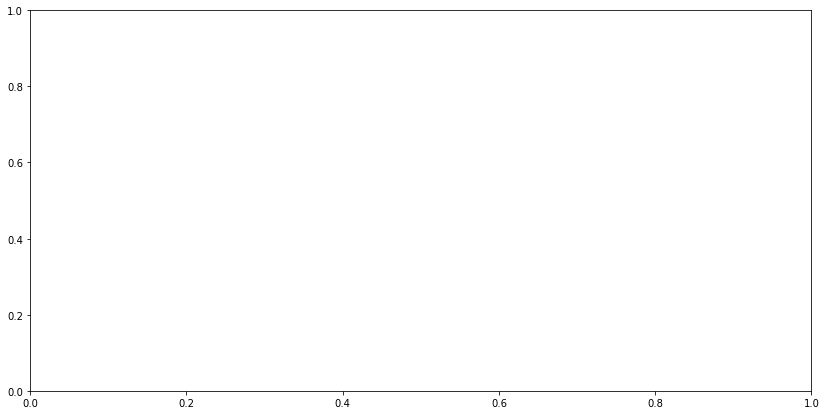

In [16]:
#Creo el gráfico y seteo el tamaño:
plt.figure(figsize=(14,7))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.bar(cant_suc.index,cant_suc, color='palegreen')


#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Cantidad de Clientes en Mora', size=14)
plt.xlabel('Sucursal', size=14)
plt.title('Cantidad de Clientes en mora por Sucursal', size=18, pad=25)

#Ajustes adicionales:
plt.grid(False)
plt.xticks(rotation=90)
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center")
        
add_value_label(cant_suc.index,cant_suc)       
plt.annotate("Clientes en Mora en Sucursales", (20, 30))


#Mostar el gráfico:
plt.show();

Creo un df con los promedios de los valores de la deuda en $ y otro con los dias de atraso.-

In [ ]:
prom_suc=round(df.groupby(by='Nombre_Sucursal').Deuda_Pesificada.mean(),2)
prom_suc

In [ ]:
atraso_suc=round(df.groupby(by='Nombre_Sucursal').Atraso.mean(),2)
atraso_suc

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
ax1.bar(prom_suc.index, prom_suc, color='lightgreen',width=0.9)
ax1.set_xlabel('Sucursal', size=14, color='green')
ax1.set_ylabel('Prom. Deuda Pesificada', size=14)
ax1.set_title('Promedio Deuda Pesificada por Sucursal', size=18, color='red')
ax1.tick_params(axis='x', color='r', rotation=90)
def add_value_label_1(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center", rotation=90)
ax1.grid(True)

ax2.bar(atraso_suc.index, atraso_suc,width=0.9)
plt.xlabel('Sucursal', size=14, color='green')
plt.ylabel('Dias de Atraso', size=14)
plt.title('Promedio Dias de Atraso por Sucursal', size=18, color='red')
plt.xticks(rotation=90)
add_value_label_1(atraso_suc.index,atraso_suc)

plt.show()

        

In [ ]:
df_def=pd.concat([cant_suc,prom_suc,atraso_suc],axis=1, join='inner')
df_def